## Tweets viejos

In [11]:
import pandas as pd
import re
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import tweepy

from unicodedata import normalize

import time

from matplotlib.font_manager import FontProperties



## MECHI, corre esto si necesitas los tweets de Elio

In [12]:
df_storm = pd.read_csv('tweets.csv', sep= ';')

## La autorización

In [13]:

# Consumer keys and access tokens, used for OAuth
consumer_key = '56jUXGuw12Fg2aHsztCJJZoSU'
consumer_secret = 'f8UEUXfwAeN198l2HNghfYrKGLH7xB888WhS9p3ofJVgEDfKb8'
access_token = '331388192-Lr6itQp6fom5tN5yNy5UP9jey9qake7EkUWqC7lh'
access_token_secret = '8VuGuoMG4Dp5g3AMK9tErdpiFP2Jfxiaa32ZeV4N3DCGM'
 
# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
 
# Creation of the actual interface, using authentication
#api = tweepy.API(auth)

api = tweepy.API(auth,wait_on_rate_limit_notify=True)
time.sleep(1)
# Creates the user object. The me() method returns the user whose authentication keys were used.
user = api.me()
 
print('Name: ' + user.name)
print('Location: ' + user.location)
print('Friends: ' + str(user.friends_count))

Name: Empe
Location: 
Friends: 9


## Funciones de Scrap y diccionario

In [14]:
def scrapeo(hashtag,cantidad=1000,fecha='2017-09-10'):
    message,retweet_count,created_at,user_name,coord,geo,metadata=[],[],[],[],[],[],[]
    i = 0
    tweepy.Status
    for tweet in tweepy.Cursor(api.search,q="#"+str(hashtag),count = cantidad, lang = 'es', since = fecha,tweet_mode='extended').items():
        if 'RT' in tweet.full_text:
            continue
        message.append(tweet.full_text)
        retweet_count.append(tweet.retweet_count)
        created_at.append(tweet.created_at)
        user_name.append(tweet.user.name)
        coord.append(tweet.coordinates)
        geo.append(tweet.geo)
        metadata.append(tweet.metadata)
        i+=1
        if i%1000 == 0: print (i,tweet.full_text)
        if i == 10000: break
    print (len(message),len(retweet_count),len(created_at),len(user_name),len(coord),len(geo))
    df=pd.DataFrame({'Message':message,
                    'Retweet Count':retweet_count,
                    'Created At':created_at,
                    'Username':user_name,
                     'Geo':geo,
                     'Coord':coord,
                     'Metadata':metadata
                    })
    df.to_csv("Twitter_%s.csv"%(hashtag))
    return(df)

    

def diccionario (msj):
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    palabras_borradas = """
    so|o|su|vos|re|pq|le|te|tu|soy|sos|mi|da|n|c|m|o|u|x|s|les|me|d|q|1|2|3|4|5|6|7|8|9|0|e|como|lo|los|mi|
    son|donde|a|el|un|la|una|en|por|para|ante|si|sobre|sin|al|rt|del|y|se|de|que|sus|ha|es|con|esta|ni|no"""
    
    word_to_ix = {}
    word_cant = {}
    emoji = []
    emoji_ix = {}
    emoji_cant = {}

    for i,twit in enumerate(msj):

        txt = pattern.sub('',twit)
        txt = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1",normalize( "NFD", txt), 0, re.I)
        txt = normalize( 'NFC', txt).lower()
        txt = txt.replace('\n','').replace(';','').replace('°','').replace('ñ','n').replace('\ufe0f','').replace('+','').replace('¡','').replace('¿','').replace('?','').replace('▯','').replace('(','').replace('|','').replace('!','').replace(')','').replace('.','').replace('-','').replace('_','').replace(',','').replace('#','').replace(':','')
        tt = txt
        for i in txt:
            if str(i).isascii()==False:
                tt = tt.replace(i,' '+i.encode('unicode-escape').decode('ASCII')+' ')
                emoji.append(i)
        txt = tt
                
        nlist = txt.lower().split(' ')


        for word in nlist:
            
            
            if re.match(palabras_borradas, word):
                continue
            if ('@' in word) and ('RELAMPAGO2018' not in word) and ('RELAMPAGO_edu' not in word) or ('jaj' in word):
                continue

            
            if word not in word_to_ix:
                word_to_ix[word] = len(word_to_ix)
                word_cant[word]  = 1
            else: word_cant[word]+=1
        for emo in emoji:
            if emo not in emoji_ix:
                emoji_ix[emo] = len(emoji_ix)
                emoji_cant[emo]  = 1
            else: emoji_cant[emo]+=1
                
    vocab_size = len(word_to_ix)
    num_labels = 2
    #print(emoji)

    return(word_to_ix,word_cant,emoji_ix,emoji_cant)

def makeImage(text):
    alice_mask = np.array(Image.open("cord.jpeg"))

    wc = WordCloud(background_color="white", max_words=200, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    fig = plt.figure(figsize=(20,20),dpi=100)
    plt.imshow(wc, interpolation="bilinear",cmap=plt.get_cmap("coolwarm"))
    #plt.axis("off")
    plt.tick_params(bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft = False)
    #plt.show()
    plt.savefig('Multiword')

In [15]:
tw = scrapeo('Lluvia')
dic = diccionario(tw['Message'])

im = makeImage(dic[1])

KeyboardInterrupt: 

In [20]:

sc = pd.read_csv('tweets.csv',';')
dick = diccionario(sc['text'])
#makeImage(dick[1])


In [17]:
dick

({'lluvia': 0,
  'venezuela': 1,
  '': 2,
  'bebe': 3,
  'trabajo': 4,
  'falta': 5,
  '\\u0001f601': 6,
  '\\u2615': 7,
  'barrio': 8,
  '\\u0001f327': 9,
  '\\u0001d5f2': 10,
  '\\u0001d600': 11,
  '\\u0001d601': 12,
  '\\u0001d5ee': 13,
  '\\u0001d5f0': 14,
  '\\u0001d5f6': 15,
  '\\u0001d5fc': 16,
  '\\u0001d5fb': 17,
  '\\u0001d5fa': 18,
  '\\u0001d602': 19,
  '\\u0001d5ef': 20,
  '\\u0001d5ff': 21,
  '\\u0001f6a7': 22,
  'plazacuatrocaminos': 23,
  'toco': 24,
  'buena': 25,
  'woow': 26,
  'ilusion': 27,
  'ir': 28,
  'buscarme': 29,
  'libro': 30,
  'karina': 31,
  'pachecosiguenos': 32,
  'javieragreda': 33,
  'karinapacheco': 34,
  '\\u2614': 35,
  'tipico': 36,
  'viento': 37,
  'petalos': 38,
  'virgendelafuensanta': 39,
  'fue': 40,
  'pronostico': 41,
  'tiempo': 42,
  'lluviaa': 43,
  'volvera': 44,
  'llover': 45,
  'juan': 46,
  'todo': 47,
  'paisraintop': 48,
  '\\xa0': 49,
  'bagtop': 50,
  'backtop': 51,
  'raintote': 52,
  'raintotecase': 53,
  'raintopfan': 54,
 

## A esto no le des bola

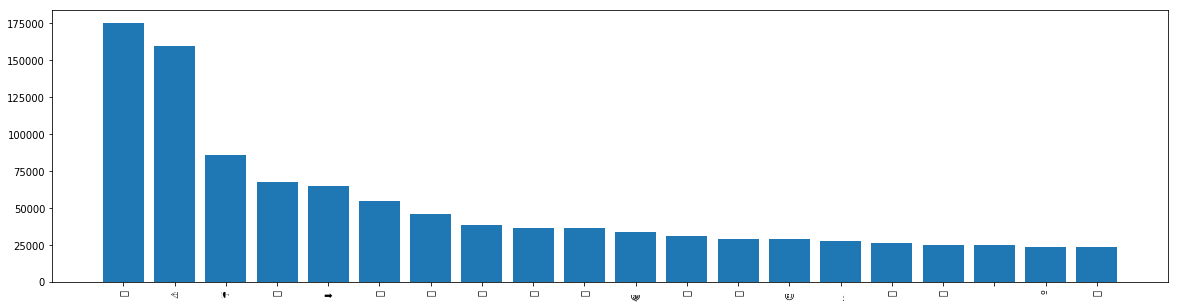

['🌧', '⚠', '☔', '⛈', '⬇', '𝗲', '𝗻', '𝗼', '𝘀', '𝗿', '😂', '💧', '𝗮', '😍', '…', '🏻', '🤔', '\u200d', 'º', '🙏', '⚡', '🤣', '“', '𝗶', '”', '𝘁', '🏼', '♂', '😩', '👇', '☕', '🌦', '❤', '𝗰', '😁', '𝗹', '👏', '𝓪', '🔥', '😅', '👍', '😔', '🤬', '😭', '•', '🚗', '🥺', '😫', '𝘂', '💪', '😮', '⛄', '🏽', '🌀', '🤦', '🇲', '🇽', '«', '😊', '🤨', '😱', '😓', '🚩', '»', '\xa0', '💦', '😋', '😳', '😏', '🌨', '𝓵', '𝓻', '😢', '🤷', '➡', '😎', '✅', '🌪', '𝗱', '🦆', '🖤', '🙊', '📸', '👽', '🎉', '☁', '♀', '𝓮', '𝓾', '😕', '🆘', '🍷', '🚴', '𝗺', '𝗯', '𝗽', '𝗳', '🌊', '🌩', '🥰', '📣', '📡', '😥', '💰', '💲', '☀', '😜', '𝓲', '𝓬', '𝓽', '𝓸', '𝓷', '💃', '🙌', '😬', '🧐', '💻', '👉', '😀', '♥', '♻', '🤭', '💫', '😒', '😃', '🐱', '🚨', '𝗴', '🐶', '📲', '✨', '🐖', '😲', '😣', '😈', '💔', '😪', '🥴', '🌬', '☝', '🤜', '💥', '𝓯', '𝓿', '🙄', '‼', '💚', '🎶', '🌿', '💜', '🚫', '😌', '☂', '🌱', '👊', '📝', '🛶', '🍅', '👌', '’', '🤙', '✌', '🌳', '💨', '🤩', '🐿', '🌮', '🐫', '🐽', '🏋', '😛', '👀', '🐷', '🥧', '🍩', '🌎', '🌚', '📱', '🇨', '🚘', '🌞', '🏡', '🛏', '😉', 'ª', '😰', '💋', '🌂', '🔦', '🚧', '🏾', '💯', '🚔', '😵', '🍃', '𝗗', '𝗔', '𝗾', '

In [6]:
import emoji

emojis = sorted(dick[3].items(),key= lambda  x: x[1],reverse=True)
labels= []
emoticonos = []
frecs = []
for i in emojis:
    emoticonos.append(i[0].encode('utf-16', 'surrogatepass').decode('utf-16'))
    labels.append(emoji.demojize(emoticonos[-1]))
    frecs.append(i[1])
  


prop = FontProperties(fname='emojione-android.ttf')

fig = plt.figure(figsize=(20,5))

p1 = plt.bar(np.arange(len(labels[:20])),frecs[:20])
pr = plt.rcParams['font.family'] = prop.get_family()
#plt.text(5,5,labels[1],)
# Make labels
"""
for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=10,
        #fontproperties = prop
)"""

plt.xticks(np.arange(len(labels[:20])),labels=emoticonos,rotation = 90)
plt.show()
print(emoticonos)

In [165]:
print(plt.get_backend())
plt.use("module://mplcairo.macosx")

module://ipykernel.pylab.backend_inline


AttributeError: module 'matplotlib.pyplot' has no attribute 'use'

## RED NEURONAL

In [7]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    print('Empieza a cargar')
    for i,line in enumerate(fin):
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
        if i %100000 == 0: print (i,line)
        if i == 300000: break
    return data

#Vector de palabras en español
file= './RN/cc.es.300.bin'

In [8]:
#f = load_vectors(file) # cargas el vector en fasttext

ValueError: invalid literal for int() with base 10: '\x16O/'

In [9]:
import fasttext as ft
#Cargo un modelo entrenado con los vectores entrenados
model = ft.load_model(file)

In [60]:
#scrap_no_met = scrapeo('Rock',cantidad= 10000)
scrap_no_met = pd.read_csv('Twitter_Rock.csv')

os.remove('data_train.txt')
train_f = open('data_train.txt','x')

In [65]:

labels = ['Meteorologico','No meteorologico']

#Twits no meteorologicos como #Rock
tw_nm = pd.read_csv('Twitter_Rock.csv')

#train_size = int(len(df_storm)*0.8)
train_size = len(tw_nm['Message'])

df_labels = pd.DataFrame([labels[0] for i in range(train_size)])
df_train = pd.DataFrame(rnd.choices(df_storm['text'],k = train_size))

# Twits meteorologicos de Elio
tw = pd.concat([df_train,df_labels],axis = 1)


#Tamaño de la muestra para train
#train_size = int(len(tw_nm)*0.8) Esto seria lo ideal

#Los hago dataframe
df_labels = pd.DataFrame([labels[1] for i in range(train_size)])
df_train = pd.DataFrame(rnd.choices(tw_nm['Message'],k = train_size))

#Contateno los twits
tw_concat = pd.concat([df_train,df_labels],axis = 1)
tw_train = pd.concat([tw,tw_concat],axis = 0,ignore_index=True)

#Cambio los nombres de las columnas
tw_train.columns = ['twit','tag']

#Genero una lista de indices aleatorios para tomar muestras al azar
rnd_index =  np.random.randint(0,len(tw_train),len(tw_train))
print(rnd_index.shape)
#Hago la muestra al azar
rnd_tw = list(tw_train['twit'][rnd_index])
#Tambien para los labels
rnd_lab = list(tw_train['tag'][rnd_index]) 


for i in range (len(rnd_lab)):
    train_f.write("__label__"+ rnd_lab[i] + " " + rnd_tw[i] + "\n")
    


(6166,)


In [69]:
model = ft.
model = ft.train_supervised('data_train.txt')


(('__label__Meteorologico', '__label__No'), array([1.00001001e+00, 1.00000034e-05]))


In [72]:
print(model.predict('Vorterix',k=2))

(('__label__Meteorologico', '__label__No'), array([1.00001001e+00, 1.00000034e-05]))


In [9]:
t = pd.read_table('data_train.txt',sep = '\t')
t

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


__label__Meteorologico Que hermoso dormir con esta lluvia
0       __label__Meteorologico @yohanaerramousp Con un...       
1       __label__Meteorologico Me encanta la lluvia xq...       
2       __label__Meteorologico Juntada para ver la llu...       
3                   __label__Meteorologico Esta lluvia ❤️       
4       __label__Meteorologico Otro sábado que llueve lpm       
5       __label__Meteorologico Qué cosa hermosa los ba...       
6       __label__Meteorologico Dos alertas meteorológi...       
7       __label__Meteorologico Me sobresalte con el te...       
8       __label__Meteorologico #SantaFe | La tormenta ...       
9       __label__Meteorologico ... tal vez la lluvia q...       
10      __label__Meteorologico Hola dejamos todo y nos...       
11                                                 Enviar       
12             __label__Meteorologico Que linda tormenta😍       
13         __label__Meteorologico El tiempo #en Santa Fe:       
14                                  Barrio Constituyentes       
15                                              T: 22.4°C       
16                                                 H: 93%       
17                                             ST: 22.4°C       
18                                            P: 998.7hPa       
19                                     Lluvia hoy: 3.0mm.       
20      __label__Meteorologico Imposible caminar por e...       
21      __label__Meteorologico Aparte de que casi me p...       
22      __label__Meteorologico #InteresGeneral Sin llu...       
23      __label__Meteorologico Me encanta estar sola e...       
24      __label__Meteorologico Veo caer las gotas, de ...       
25      __label__No meteorologico @susan_santos con su...       
26       __label__Meteorologico ESE RAYO. ME CAGUÉ ENCIMA       
27      __label__Meteorologico Me vine en al laburo Co...       
28      __label__Meteorologico Mira como llueve, justo...       
29      __label__Meteorologico #Clima | Los registros ...       
...                                                   ...       
365234  __label__Meteorologico #SÁBADO | Se termina el...       
365235  __label__Meteorologico Con esta lluvia está pa...       
365236  __label__Meteorologico Con esta lluvia ta para...       
365237  __label__Meteorologico Salir con esta lluvia? ...       
365238  __label__Meteorologico No es lluvia, son las l...       
365239  __label__No meteorologico Disponible nuestro p...       
365240    __label__Meteorologico De a dos y con lluvia 😴😍       
365241  __label__No meteorologico Desde Cancún, Quinta...       
365242                                          ¡AL AIRE!       
365243                                 #ProgramaSinNombre       
365244                                    Lunes a viernes       
365245                               1 a 2:30 de la tarde       
365246                                    Origen 95.3 FM        
365247                            https://t.co/GrY892pHqm       
365248                                   Cabina: 361 7043       
365249              #Cancún #Rock https://t.co/cTj6NCf3hh       
365250  __label__No meteorologico LO MEJOR DEL ROCK EN...       
365251  #Mexico #Latinoamerica #Rock #Festivales #Even...       
365252          #LaCapitalDelRock https://t.co/a2HGtv8jHE       
365253  __label__No meteorologico Margaritas Rock Fest...       
365254  #Rock solidario en #Getafe con COZ, Monterrey,...       
365255                            https://t.co/Y3DlIJ4KLy       
365256  __label__No meteorologico Volvemos en vivo por...       
365257  __label__Meteorologico Algo mas lindo que dorm...       
365258  __label__Meteorologico #SÁBADO | Se termina el...       
365259  __label__Meteorologico Y esta lluvia de donde ...       
365260  __label__Meteorologico 6h ClimaRafaela: Temp. ...       
365261  __label__Meteorologico El tiempo en San Carlos...       
365262  Después de pronósticos de tormenta, lluvia, de...       
365263  __label__Meteorologico 20h Agvnet 